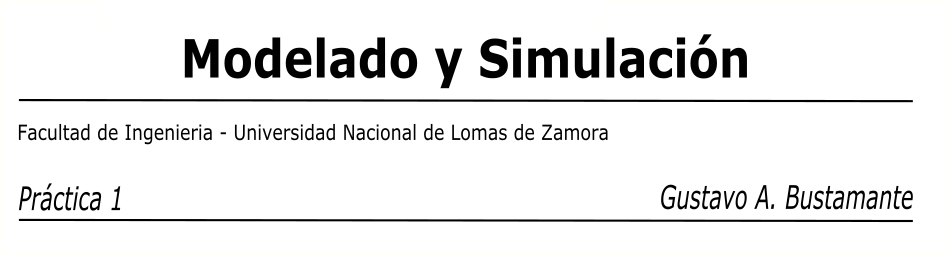

# PDE TRI-DIMENSIONAL (ec. POISON aplicada a la Transferencia de Calor)

Considere el problema de hallar la función $u(x,y,z)$ que satisfaga la ecuación diferencial parcial (Ec. de poison):
$$
$$
$$
-\frac{\partial ^2u}{\partial x^2}-\frac{\partial ^2u}{\partial y^2}-\frac{\partial ^2u}{\partial z^2}=f(x,y,z)
$$

Se considera que el dominio es un cubo Unitario y las condiciones aplicadas sobre el contorno se indican en la figura.


**Utilizando Diferencias centrales,**
$$
\frac{\partial^2 u}{\partial x^2}=\frac{T_{i+1,j,k}-2.T_{i,j,k}+T_{i-1,j,k}}{\Delta h_{x}^2} + o(h_{x}^2)
$$
$$$$
$$
\frac{\partial^2 u}{\partial y^2}=\frac{T_{i,j+1,k}-2.T_{i,j,k}+T_{i,j-1,k}}{\Delta h_{y}^2}+ o(h_{y}^2)
$$
$$$$
$$
\frac{\partial^2 u}{\partial z^2}=\frac{T_{i,j,k+1}-2.T_{i,j,k}+T_{i,j,k-1}}{\Delta h_{z}^2}+ o(h_{z}^2)
$$

Despreciando los términos de orden superior y desarrollando un esquema implícito, y suponiendo además que $\Delta h_{x} = \Delta h_{y} =\Delta h_{z} = h$

Despreciando los términos de orden superior $o(h_{x,y,z}^2)$ y Reemplazando se obtiene,
$$$$
$$$$
$$
-\frac{T_{i+1,j,k}-2.T_{i,j,k}+T_{i-1,j,k}}{\Delta h_{x}^2} -\frac{T_{i,j+1,k}-2.T_{i,j,k}+T_{i,j-1,k}}{\Delta h_{y}^2} -\frac{T_{i,j,k+1}-2.T_{i,j,k}+T_{i,j,k-1}}{\Delta h_{z}^2} = f(x,y,z)
$$
$$$$
$$$$
Reordenando,
$$$$
$$
T_{i+1,j,k} + T_{i-1,j,k} + T_{i,j+1,k} + T_{i,j-1,k} + T_{i,j,k+1} + T_{i,j,k-1} - 6.T_{i,j,k} = -f(x,y,z)*h^2
$$
$$$$
$$$$
Se Puede observar que la discretización tendrá **7 incógnitas**

A modo de ejemplo, Se asume una placa cuadrada con una discretización de 4 elementos por lado,
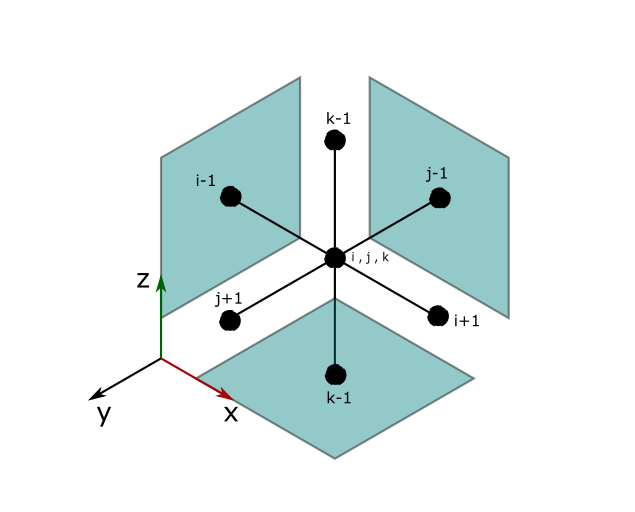
Definiendo las temperaturas $T_{L1}$, $T_{L2}$, $T_{L3}$, $T_{L4}$ y $T_{L5}$ como Condiciones de Dirichlet, mientras que la cara paralela al plano $zy$ será Adiabática (según se detalla en la figura)
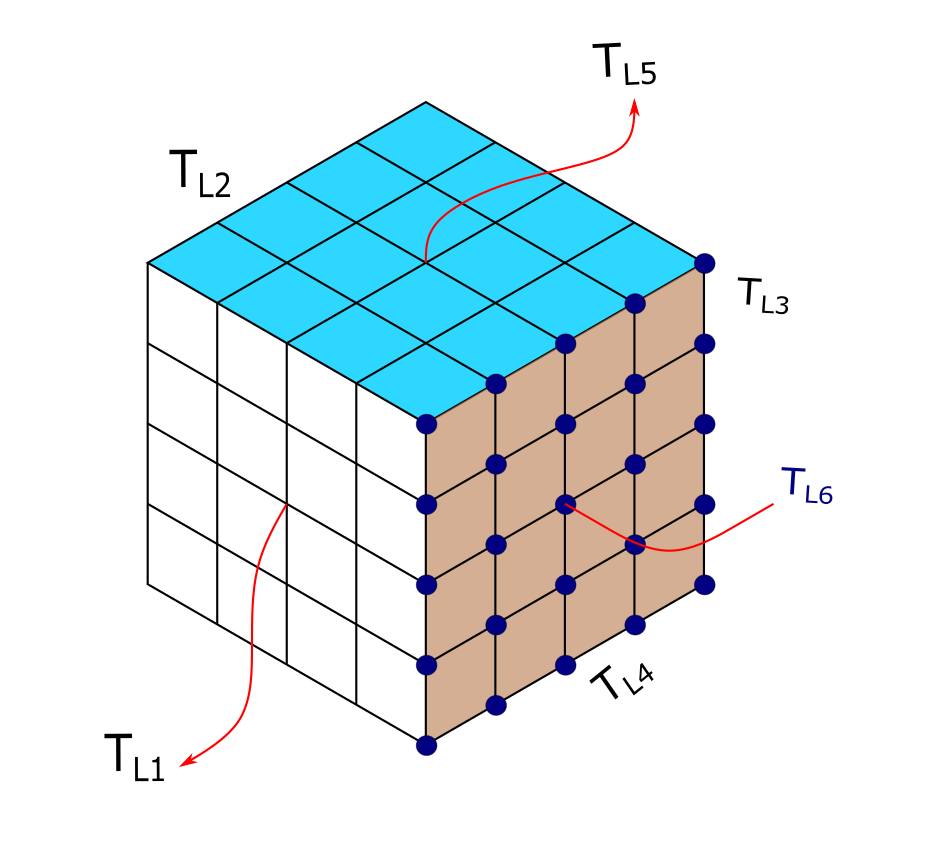

# 4. Resolución por el Método SOR (sobre relajaciones sucesivas)

El Método de SOR para la resolución del sistema de ecuaciones se representa mediante el siguiente algoritmo, donde $w$ es un parámetro de relajación del método,

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d
import pandas as pd
from pandas import DataFrame

In [64]:
def Sor(Nelementos,MaxIteraciones,Tolerancia,w):
    tol=Tolerancia
    Maxiter=MaxIteraciones
    #------------------------------------------
    #------- Constantes y Cond. Inic. ---------
    #------------------------------------------ 
    L=1.0            # Largo de la placa
    Np=Nelementos    # Cantidad de elementos por lado
    dx=L/Np          # Delta posición   dx = dy = dz
    Nodos=(Np+1)**3  # Cantidad de Nodos TOTAL
    T1,T2,T3,T4,T5,T6=300.0,300.0,1000.0,300.0,300.0,300.0 # Temp. Impuestas Bordes (Ver figura)

    kk=0
    error=1.0
    err=np.zeros(Nodos)
    Eh=np.zeros(Maxiter+1)
   
    xx = np.linspace(0.0, L, Np+1) 
    yy = np.linspace(0.0, L, Np+1)
    zz = np.linspace(0.0, L, Np+1) 
    X1, Y1, Z1 = np.meshgrid(xx, yy, zz) # Grilla x-y-z

    #---------------------------------------------
    #----------- Inicializo variables ------------
    #---------------------------------------------
    du=np.zeros(Nodos) # Inicializo dU
    u=np.zeros(Nodos)  # Inicializo U
    u1=np.zeros(Nodos) # Inicializo U en k+1

    while error>=tol and kk<=Maxiter:
        u=u1
        kk=kk+1
        for k in range(1,Np+2):          # Recorre las ALTURA 
            for i in range(1,Np+2):      # Recorre las FILAS
                for j in range(1,Np+2):  # Recorre las COLUMNAS
                    p=((i-1)*(Np+1) + j -1)+ (k-1)*((Np+1)**2)
                    f=X1[i-1,j-1,k-1]**2 + Y1[i-1,j-1,k-1]**2 + Z1[i-1,j-1,k-1]**2
                    
                    if k==1:       #-------- Altura inicial
                        u[p]=T4; u1[p]=T4
                    elif k==Np+1:  #-------- Altura Final
                        u[p]=T5; u1[p]=T5
                    else:          #-------- Altura Intermedia
                        
                        #-------------------------------
                        #--------- PRIMER FILA ---------
                        #-------------------------------            
                        if i==1:
                            u[p]=T6; u1[p]=T6
                            
                        #-------------------------------
                        #-------- ULTIMA FILA ----------
                        #-------------------------------
                        elif i==Np+1:
                                u[p]=T2; u1[p]=T2
                              
                        #-------------------------------
                        #----- FILAs INTERMEDIAS -------
                        #-------------------------------
                        else:
                            if j==1:
                            #---primer columna---
                                u[p]=T1; u1[p]=T1
                                
                            elif j==Np+1:
                            #---ultima columna---
                                u[p]=T3; u1[p]=T3
 
                            else: 
                            #---Columna intermedia--- 
                                du[p]=w*(1/6)*(u[p+1] + u1[p-1] + u[p +Np+1] + u1[p -(Np+1)] + u[p + (Np+1)**2] + u1[p - (Np+1)**2] - 6*u[p] + f*dx**2 )
                                u1[p]=(1.0-w)*du[p] + du[p]*w +u[p]

        err=np.absolute(du)
        error=np.max(err)   
        Eh[kk-1]=error
    return u1, Eh, kk, error, X1, Y1,Z1

## SOR ( óptimo valor de  " w " )

In [68]:
N=10  # Cantidad de elementos por Lado
Maxiter=7000  # Máximas iteraciones
Tol=1e-8      # Tolerancia

W=[0.8,1.0,1.4,1.6,1.7,1.8,1.9,2.0]
k=np.zeros(8)
for i in range(1,9):
    [uS, Eh, kS, error,X,Y,Z]=Sor(N,Maxiter,Tol,W[i-1]) # LLamo función
    k[i-1]=kS

In [70]:
N=20  # Cantidad de elementos por Lado
k1=np.zeros(8)
for i in range(1,9):
    [uS, Eh, kS, error,X,Y,Z]=Sor(N,Maxiter,Tol,W[i-1]) # LLamo función
    k1[i-1]=kS

In [71]:
N=40  # Cantidad de elementos por Lado
k2=np.zeros(8)
for i in range(1,9):
    [uS, Eh, kS, error,X,Y,Z]=Sor(N,Maxiter,Tol,W[i-1]) # LLamo función
    k2[i-1]=kS

In [72]:
h=DataFrame({'w':W,' h = 1 / 10 ':k,' h = 1 / 20 ':k1,' h = 1 / 40 ':k2})
h


,w,h = 1 / 10,h = 1 / 20,h = 1 / 40
0,0.8,343.0,1283.0,4790.0
1,1.0,231.0,870.0,3258.0
2,1.4,93.0,381.0,1450.0
3,1.6,62.0,215.0,858.0
4,1.7,80.0,134.0,604.0
5,1.8,123.0,130.0,360.0
6,1.9,245.0,247.0,267.0
7,2.0,7001.0,7001.0,7001.0


Se pueden observar resultados similares a la resolución de la ecuación de Poisson bidimensional. En la tabla pueden verse, además, los distintos valores de $w$ estudiados junto con las iteraciones necesarias para llegar al resultado.

## Corte según plano paralelo a "plano xy " 

In [82]:
N=40  # Cantidad de elementos por Lado
Maxiter=7000  # Máximas iteraciones
Tol=1e-8      # Tolerancia
w=1.9
[uS, Eh, kS, error,X,Y,Z]=Sor(N,Maxiter,Tol,w) # LLamo función

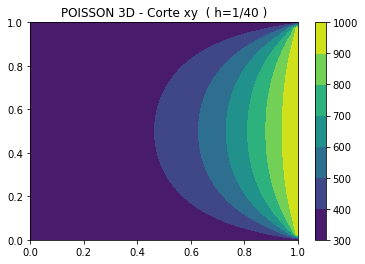

In [89]:
pp=(N+1)**2*(20)
u1=uS[pp:pp+(N+1)**2]
Z1=u1.reshape(N+1,N+1)   # Rediseño el vector TEMPERATURA NODAL
xx = np.linspace(0.0, 1.0, N+1); yy = np.linspace(0.0, 1.0, N+1)
X1, Y1 = np.meshgrid(xx, yy) # Grilla x-y-z

cs = plt.contourf(X1, Y1, Z1) 
cbar = plt.colorbar(cs) 
plt.title('POISSON 3D - Corte xy  ( h=1/40 )') 
plt.show() 

En la figura se observa un corte del cubo, según un plano paralelo al plano xy y que pasa por el centro del mismo. recordando que todas las caras tenían una temperatura de dirichlet impuesta.